In [398]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, euclidean

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/bags.csv', header=None)
dataset = np.array(df.values)

In [388]:
N = 14
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=1, n_jobs=6,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(dataset)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=1, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 3.3105661869049072s


In [392]:
silhouette = metrics.silhouette_score(dataset, km.labels_)

silhouette

In [394]:
closest, distances = pairwise_distances_argmin_min(km.cluster_centers_, dataset)

distance1 = []
# distance2 = []
# distance3 = []
# distance4 = []
# distance5 = []

for i in dataset:
        distance1.append(np.linalg.norm(i - km.cluster_centers_[13]))
#         distance2.append(euclidean(i, km.cluster_centers_[1]))
#         distance3.append(euclidean(i, km.cluster_centers_[2]))
#         distance4.append(euclidean(i, km.cluster_centers_[3]))
#         distance5.append(euclidean(i, km.cluster_centers_[4]))

distance1 = np.asarray(distance1)
# distance2 = np.asarray(distance2)

In [395]:
closest, distances

(array([   99,  4764,    99,    99,    99,    99,    99,    99,    99,
           99,  2944,    99, 10224,    99]),
 array([0.07186124, 0.48843847, 0.3959161 , 0.38289188, 0.25200728,
        0.29976469, 0.50266067, 0.3893802 , 0.31968239, 0.39800254,
        0.47962252, 0.28440583, 0.49017982, 0.2989584 ]))

In [326]:
for i in enumerate(closest):
#     print(i)
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: Who are the unvaccinated? @JoshLevs

Cluster 1: Today's #getfit tip @MensHealth: Working the night shift? Adjust your concept of mealtime &amp; eat the biggest meal when you get home

Cluster 2: Who are the unvaccinated? @JoshLevs

Cluster 3: Who are the unvaccinated? @JoshLevs

Cluster 4: 'Love hormone' may treat anorexia

Cluster 5: Who are the unvaccinated? @JoshLevs

Cluster 6: Your thoughs: Less pink, more cures for breast cancer

Cluster 7: Who are the unvaccinated? @JoshLevs

Cluster 8: Who are the unvaccinated? @JoshLevs

Cluster 9: Who are the unvaccinated? @JoshLevs

Cluster 10: Who are the unvaccinated? @JoshLevs

Cluster 11: Everyday Health Daily Digest is out!

Cluster 12: Who are the unvaccinated? @JoshLevs

Cluster 13: Who are the unvaccinated? @JoshLevs

Cluster 14: Who are the unvaccinated? @JoshLevs

Cluster 15: VA under scrutiny after Legionnaires' deaths

Cluster 16: 10 snacks to help you lose weight, burn fat, and build muscle:

Cluster 17: Could 'person

In [223]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
labels = km.labels_
# print(prediction)
count = 0
for i in labels:
    if i == 1:
        print("Cluster {}: {}".format(i, health_lines[count]))
        count += 1
        if count == 5:
            break

Cluster 1: An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need

Cluster 1: A plant-based diet that incorporates fish may be the key to preventing colorectal cancers:

Cluster 1: It doesn't take much to damage your hearing at a sports bar or nightclub. That's why a billion people are at risk.

Cluster 1: RT @CNN: Forever young? Discover this island’s secrets to longevity on #TheWonderList w/ @BillWeirCNN 

Cluster 1: RT @CNN: Is post-traumatic stress disorder in your genes? A simple blood test may one day help tell you



In [ ]:
i = 0
for i in range(dataset.shape[0]):
    pass
print(i)

In [82]:
km.inertia_

12133.347513974413

In [396]:
run = True
if run:
    Nc = range(1, 50)

    kmeans = []
    score = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i, n_jobs=6))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset).inertia_)

Fitting kmeans with 1 clusters
Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters
Fitting kmeans with 10 clusters
Fitting kmeans with 11 clusters
Fitting kmeans with 12 clusters
Fitting kmeans with 13 clusters
Fitting kmeans with 14 clusters
Fitting kmeans with 15 clusters
Fitting kmeans with 16 clusters
Fitting kmeans with 17 clusters
Fitting kmeans with 18 clusters
Fitting kmeans with 19 clusters
Fitting kmeans with 20 clusters
Fitting kmeans with 21 clusters
Fitting kmeans with 22 clusters
Fitting kmeans with 23 clusters
Fitting kmeans with 24 clusters
Fitting kmeans with 25 clusters
Fitting kmeans with 26 clusters
Fitting kmeans with 27 clusters
Fitting kmeans with 28 clusters
Fitting kmeans with 29 clusters
Fitting kmeans with 30 clusters
Fitting kmeans with 31 clusters
Fitting kmeans wi

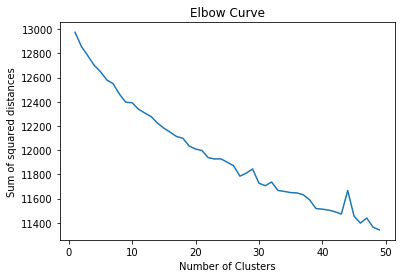

In [397]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()

# PCA

In [425]:
for i in range(1200, 0, -100):
    pca = PCA(n_components=i)
    dataset_PCA = pca.fit_transform(dataset)
    total_variance = np.sum(pca.explained_variance_ratio_)
    if i % 50 == 0:
        print('{} components. Total variance: {}'.format(i, total_variance))
    if total_variance <= 0.95:
        print(i)
        print(total_variance)
        break

1200 components. Total variance: 0.9997693679955177
1100 components. Total variance: 0.9813025252099665
1000 components. Total variance: 0.9537150757987498
900 components. Total variance: 0.9162005405380298
900
0.9162005405380298


In [471]:
for i in range(1000, 0, -10):
    pca = PCA(n_components=i)
    dataset_PCA = pca.fit_transform(dataset)
    total_variance = np.sum(pca.explained_variance_ratio_)
    if i % 20 == 0:
        print('{} components. Total variance: {}'.format(i, total_variance))
    if total_variance <= 0.96:
        print(i)
        print(total_variance)
        break

1000 components. Total variance: 0.9537150757987498
1000
0.9537150757987498


In [472]:
pca = PCA(n_components=1000)
dataset_PCA = pca.fit_transform(dataset)

In [520]:
N = 7
verbose = False

km_PCA = KMeans(n_clusters=N, init='k-means++', max_iter=5000, n_init=1, n_jobs=6,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km_PCA.fit(dataset_PCA)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=1, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 1.7605724334716797s


In [521]:
closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)

closest_PCA, distances_PCA

(array([404, 231, 197,  99, 404, 197, 197]),
 array([0.38739505, 0.3856919 , 0.36102942, 0.06689084, 0.39252135,
        0.38655799, 0.29458914]))

In [522]:
silhouette_PCA = metrics.silhouette_score(dataset_PCA, km_PCA.labels_)

silhouette_PCA

0.009494834214617191

In [450]:
for i in enumerate(closest_PCA):
#     print(i)
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: Pilots of wayward plane may have suffered from cerebral hypoxia. Here's what that is:

Cluster 1: There is a zit-causing bug that bears Frank Zappa's name. That is all.

Cluster 2: .@TriHardMike ran his 1st 5K at #Run4Wilbs. How are you inspiring others to #getfit today? Show us for an RT

Cluster 3: More paramedics quitting NHS jobs

Cluster 4: Are you wearing purple for #SpiritDay? They are:

Cluster 5: Who are the unvaccinated? @JoshLevs

Cluster 6: Pilots of wayward plane may have suffered from cerebral hypoxia. Here's what that is:

Cluster 7: Who are the unvaccinated? @JoshLevs

Cluster 8: My mastectomy: Staying alive for our kids

Cluster 9: #StrokeChat #WorldStrokeDay



In [524]:
run = True
if run:
    Nc = range(2, 30)

    kmeans = []
    score = []
    silhouettes = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i, n_jobs=6))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset_PCA).inertia_)
        silhouettes.append(metrics.silhouette_score(dataset_PCA, kmeans[i].labels_))

Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters
Fitting kmeans with 10 clusters
Fitting kmeans with 11 clusters
Fitting kmeans with 12 clusters
Fitting kmeans with 13 clusters
Fitting kmeans with 14 clusters
Fitting kmeans with 15 clusters
Fitting kmeans with 16 clusters
Fitting kmeans with 17 clusters
Fitting kmeans with 18 clusters
Fitting kmeans with 19 clusters
Fitting kmeans with 20 clusters
Fitting kmeans with 21 clusters
Fitting kmeans with 22 clusters
Fitting kmeans with 23 clusters
Fitting kmeans with 24 clusters
Fitting kmeans with 25 clusters
Fitting kmeans with 26 clusters
Fitting kmeans with 27 clusters
Fitting kmeans with 28 clusters
Fitting kmeans with 29 clusters


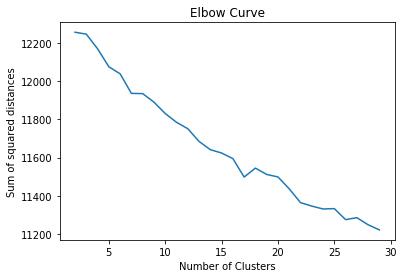

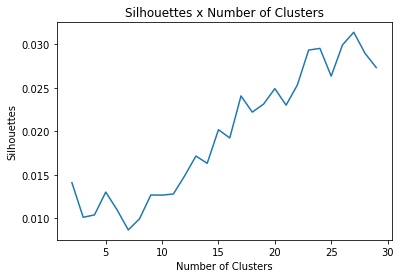

In [525]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()
    
    
    plt.plot(Nc,silhouettes)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Silhouettes')

    plt.title('Silhouettes x Number of Clusters')

    plt.show()

# Aqui tentei usar o txt para fazer o k-means, mas não terminei

In [ ]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

In [ ]:
from nltk.corpus import stopwords
import nltk
# nltk.download()

In [ ]:
sw = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=sw)
X = vectorizer.fit_transform(health_lines)
# X = vectorizer.transform(health_lines)

In [ ]:
type(X)

In [ ]:
print(X)

In [ ]:
vectorizer.vocabulary_

In [ ]:
N = 6
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=1000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(X)
print("done in {}s".format(time() - t0))

In [ ]:
Nc = range(1, 30)

kmeans = []
score = []

for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

for i in range(len(kmeans)):
    print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
#     score.append(kmeans[i].fit(X).score(X))
    score.append(kmeans[i].fit(X).inertia_)

In [ ]:
plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [ ]:
print(km.predict(X[10:20]))